# <center>Convolutional Neural Network</center>

# <center>Homework 3</center>

# <center>COSC 4337</center>

# <center>Dr. Rizk</center>

# <center>Dosbol Aliev</center>

# <center>MyUH: 1867424</center>

## About

In this homework we will create a Convolutional Neural Network (CNN) from scratch in
Python. We will implement things such as a Reshape Layer, the Binary Cross Entropy Loss,
and the Sigmoid Activation, etc. Finally, we'll use all these objects to make a neural
network capable of classifying handwritten digits from the MNIST dataset. Before
beginning, make sure you’re comfortable calculating cross correlation and convolution
from a given input and kernel. See the next 2 slides.
Be sure to download the starter code files. You’re welcome to transfer the code to a
jupyter notebook if you’d rather code in there.

In [1]:
from PIL import Image 
# I am importing PIL Library to impoty my pictures

#### Note: Don’t worry if your code doesn't work 100% or if you get poor results when training. What matters most is your effort and understanding, so leave comments documenting things where possible and the TA will grade you based on your understanding of CNN and if you’re on the right track.

## Cross-Correlation

Given the following input and kernel, what is the cross correlation (output)?


Learn more about cross-correlation here:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html

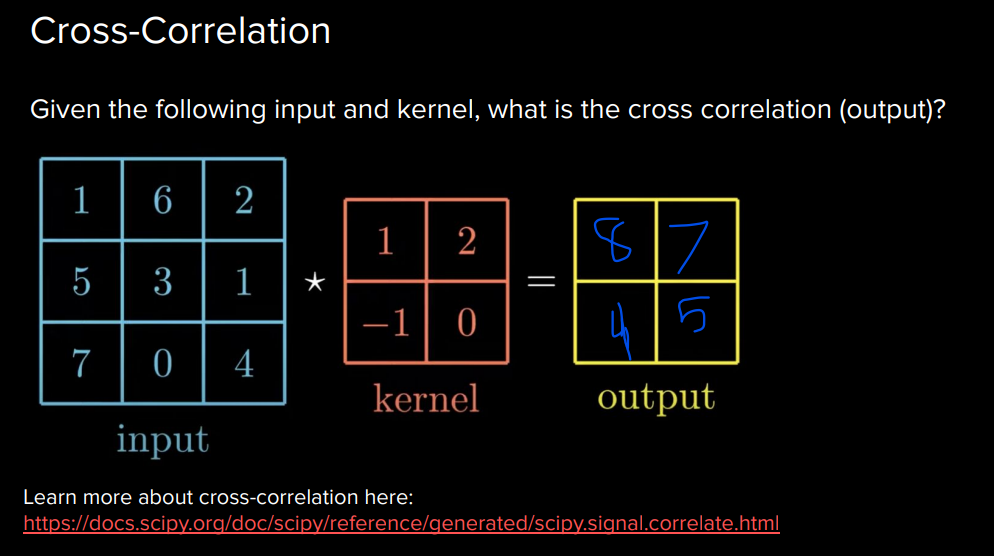

In [2]:
cross_correlation= Image.open("cross-correlation.PNG")
cross_correlation

## Convolution

Using the given input and kernel, what is the convolution (output)? Hint: Rotate the
kernel 180. 

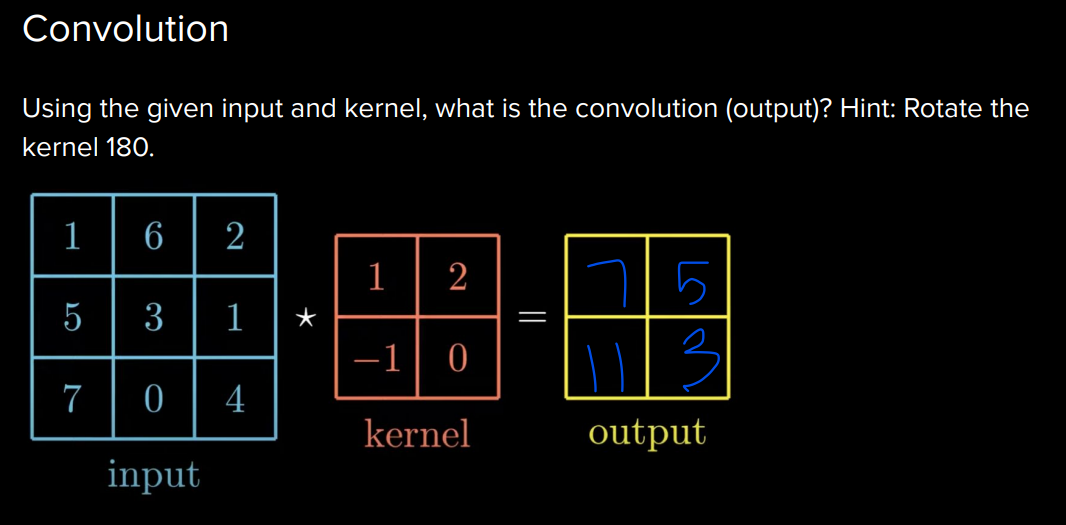

In [3]:
Convolution= Image.open("Convolution.PNG")
Convolution

## The Convolutional Class


We’ll start by creating our convolutional class, which is where we’ll implement a
forward and backward pass. Here’s the following that we’ll start with. See more
details in next slide

In [4]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# To ignore all Keras Warnings!!!

In [5]:
import numpy as np
from scipy import signal
from layer import Layer


class ConvolutionalLayer(Layer):
    def __init__(self, input_shape, kernel_size, depth):
        input_depth, input_height, input_width = input_shape
        self.depth = depth
        self.input_shape = input_shape
        self.input_depth = input_depth
        self.output_shape = (
            depth,
            input_height - kernel_size + 1,
            input_width - kernel_size + 1,
        )
        self.kernels_shape = (depth, input_depth, kernel_size, kernel_size)
        self.kernels = np.random.randn(*self.kernels_shape)
        self.biases = np.random.randn(*self.output_shape)

    def forward(self, input):
        self.input = input
        self.output = np.copy(self.biases)
        for i in range(self.depth):
            for j in range(self.input_depth):
                self.output[i] += signal.correlate2d(
                    self.input[j], self.kernels[i, j], "valid"
                )
        return self.output

    def backward(self, output_gradient, learning_rate):
        kernels_gradient = np.zeros(self.kernels_shape)
        input_gradient = np.zeros(self.input_shape)

        for i in range(self.depth):
            for j in range(self.input_depth):
                kernels_gradient[i, j] = signal.correlate2d(
                    self.input[j], output_gradient[i], "valid"
                )
                input_gradient[j] += signal.convolve2d(
                    output_gradient[i], self.kernels[i, j], "full"
                )

        self.kernels -= learning_rate * kernels_gradient
        self.biases -= learning_rate * output_gradient
        return input_gradient


## The Convolutional Class

- The constructor takes as input the input_shape (a tuple containing the depth,
height, and width of the input), the kernel_size (a number representing the size
of each matrix inside each kernel), and the depth (a number representing how
many kernels we want) aka the depth of the output.
<br>
- We’ve computed the output and kernel shape for you, but be sure that you
understand why those are the correct shapes.
<br>
- Finally, the kernels and biases are initialized randomly.

## Implementing Forward

- Your job is to implement the forward method, which takes the input and should
compute the following formula. Y is the output, B is the bias matrix, X is the
input, k is the kernel. Note that the star notation stands for the cross correlation
that you computed earlier. 

## Implementing Forward

You should have the following started code in the convolutional.py file. Please
implement the forward method here or in a jupyter notebook if you transferred the
code over. 

    def forward(self, input):
        self.input = input
        self.output = None
        # TODO: Implement the forward method using the formula provided in the powerpoint. 
        # You may add or remove any variables that you wish. 
        return self.output

## Implementing Backward

You should have the following started code in the convolutional.py file. Please
implement the backward method here or in a jupyter notebook if you transferred
the code over. 

    def backward(self, output_gradient, learning_rate):
        # TODO: initialize the kernels_gradient and input_gradient.
        kernels_gradient = None
        input_gradient = None

        # TODO: implement the back pass here. The equations in the ppt may help, but you're free to
        # add as much or as little code as you'd like. 

        # TODO: update the kernels and biases
        self.kernels -= None
        self.biases -= None

        return input_gradient

## Implementing Reshape

The output of the convolutional layer is a 3d block, so we’ll need to reshape this
into a column vector before passing into our final dense layer for classification.
<br>
<br>
You can find the starter code in reshape.py, or you can transfer the next slide into
your notebook.

## Implementing Reshape

In [6]:
import numpy as np
from layer import Layer


class ReshapeLayer(Layer):
    def __init__(self, input_shape, output_shape) -> None:
        self.input_shape = input_shape
        self.output_shape = output_shape

    def forward(self, input):
        # TODO: reshape the input to the output_shape and return it.
        self.input = input
        return np.reshape(input, self.output_shape)

    def backward(self, output_gradient, learning_rate):
        # TODO: reshape the output to the input_shape and return it.
        return np.reshape(output_gradient, self.input_shape)


## Implementing Dense Layer

Let’s implement our dense layer. The started code is located in dense.py This
should be similar to previous homeworks when you learned about neural networks.
- The constructor takes the input_size and output_size. Implement the forward
method. Recall formula for a dense layer is just: y = xA^T + b. You can read
more about linear / dense layers here.
https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
- Implement the backward method. 

## Implementing Dense Layer

In [7]:
import numpy as np
from layer import Layer


class DenseLayer(Layer):
    def __init__(self, input_size, output_size) -> None:
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.bias

    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient, self.input.T)
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * output_gradient
        return np.dot(self.weights.T, output_gradient)


## Implementing Binary Cross Entropy Loss

Why is binary cross entropy loss a good choice here?

### Cross-entropy loss, or log loss, measure the performance of a classification model whose output is a probability value between 0 and 1. and in this problem we work in two classes classification so it will be best chose here

## Implementing Binary Cross Entropy Loss

Given the desired output (y*) and the network’s output (y), we will need to calculate
the following. You can find the starter code in losses.py

In [8]:
import numpy as np


def binary_cross_entropy(y_true, y_pred):
    # TODO: return the binary_cross_entropy loss
    return np.mean(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))


def binary_cross_entropy_prime(y_true, y_pred):
    # TODO: return the binary_cross_entropy_prime. 
    # Note, this is the formula on the bottom in the ppt slides.
    return ((1 - y_true) / (1 - y_pred) - y_true / y_pred) / np.size(y_true)


## Implementing Sigmoid Activation

Recall that the sigmoid is defined as

## Implementing Sigmoid Activation

You can find the starter code in activations.py

In [9]:
import numpy as np
from layer import Layer

class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))


In [10]:
import numpy as np
from activation import ActivationLayer

class Tanh(ActivationLayer):
    ''' 
    Optional Tanh function if you'd like to try alternatives and see what happens.
    '''
    def __init__(self):
        def tanh(x):
            return np.tanh(x)

        def tanh_prime(x):
            return 1 - np.tanh(x) ** 2

        super().__init__(tanh, tanh_prime)

class SigmoidLayer(ActivationLayer):
    def __init__(self):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))

        def sigmoid_prime(x):
            s = sigmoid(x) * (1 - sigmoid(x))
            return s 

        super().__init__(sigmoid, sigmoid_prime)

## Putting it all together

We now have all of the pieces to put our network together and begin training.
We’ve provided most of the code for you in mnist_conv.py, but would like for you to
implement the following:
- Create a list (network) containing all of our layers. It should looks something
like Convolution → Sigmoid → Reshape → Dense → Sigmoid. Note that the image
sizes are 28 * 28 and you may experiment with kernel sizes of your choice. Try
to keep things small to avoid long wait times.
- Fill in / finish the main training loop. Note, this should look standard to most
neural network training loops. 

In [11]:
import numpy as np


def binary_cross_entropy(y_true, y_pred):
    # TODO: return the binary_cross_entropy loss
    return np.mean(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))


def binary_cross_entropy_prime(y_true, y_pred):
    # TODO: return the binary_cross_entropy_prime. 
    # Note, this is the formula on the bottom in the ppt slides.
    return ((1 - y_true) / (1 - y_pred) - y_true / y_pred) / np.size(y_true)


## Putting it all together

In [12]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils

from convolutional import ConvolutionalLayer
from dense import DenseLayer
from reshape import ReshapeLayer
from activations import SigmoidLayer
from softmax import SoftmaxLayer
from losses import binary_cross_entropy, binary_cross_entropy_prime


def preprocess_data(x, y, limit):
    ''' 
    Will limit our data since using the whole thing will take forever on a cpu especially since we're
    implementing this from scratch.
    '''
    x = x.reshape(len(x), 1, 28, 28)
    x = x.astype("float32") / 255
    y = np_utils.to_categorical(y)
    y = y.reshape(len(y), 10, 1)
    return x[:limit], y[:limit]

# load MNIST from server, limit to 100 images per class since we're not training on GPU
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 100)
x_test, y_test = preprocess_data(x_test, y_test, 100)

# TODO: Add our layers and the flow of input into this list. 
network = [
    ConvolutionalLayer((1, 28, 28), 3, 5),
    SigmoidLayer(),
    ReshapeLayer((5, 26, 26), (5 * 26 * 26, 1)),
    DenseLayer(5 * 26 * 26, 100),
    SigmoidLayer(),
    DenseLayer(100, 100),
    SigmoidLayer(),
    DenseLayer(100, 10),
    SoftmaxLayer(),
]

#train
def process(network, x):
    output = x
    for layer in network:
        output = layer.forward(output)
    return output


def train(
    network,
    loss,
    loss_prime,
    x_train,
    y_train,
    epochs=1000,
    learning_rate=0.01,
    verbose=True,
):
    for e in range(epochs):
        error = 0
        for x, y in zip(x_train, y_train):
            # forward
            output = process(network, x)


            # TODO: update our error
            error += loss(y, output)
            grad = loss_prime(y, output)


            # TODO: perform back prop 
            for layer in reversed(network):
                grad = layer.backward(grad, learning_rate)

        error /= len(x_train)
        print(f"{e + 1}/{epochs}, error={error}")


train(
    network,
    binary_cross_entropy,
    binary_cross_entropy_prime,
    x_train,
    y_train,
    epochs=100,
    learning_rate=0.1,
)

# TODO: run the test data through and print out your predictions
for x, y in zip(x_test, y_test):
    output = process(network, x)
    print(f"{np.argmax(output)} excepted {np.argmax(y)}")


1/100, error=0.5321239753887196
2/100, error=0.32474760159237465
3/100, error=0.2990890351861154
4/100, error=0.2819526636948532
5/100, error=0.2868170314365248
6/100, error=0.2610476540968283
7/100, error=0.24667346982504326
8/100, error=0.22969150939282534
9/100, error=0.2209031565604622
10/100, error=0.21340980942606752
11/100, error=0.19846343424449764
12/100, error=0.18224834402295417
13/100, error=0.19815615788712246
14/100, error=0.17932596593898292
15/100, error=0.17928568116795573
16/100, error=0.15561035207610494
17/100, error=0.14887769376745752
18/100, error=0.14554257569389892
19/100, error=0.14082647549306057
20/100, error=0.1334992159747616
21/100, error=0.1267919882328278
22/100, error=0.12076137250699955
23/100, error=0.11636621227394414
24/100, error=0.11085468197190346
25/100, error=0.1050199974406147
26/100, error=0.10191932666464279
27/100, error=0.09666268719036435
28/100, error=0.0925833389003218
29/100, error=0.0884610356361463
30/100, error=0.08563627288124019


# <center>Congratulations!</center>

Making these networks from scratch is a great way to learn in detail what’s going on. Feel free to play
around with this or keep implementing other models / algorithms from scratch as practice. Please reach out
to the TA or revisit lecture slides if you’re still iffy on CNN. 